In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import scipy
import scipy.stats
from tqdm import tqdm
import time
%pylab inline

plt.rcParams["figure.figsize"] = (10,7)

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### Решение в матричной форме

In [2]:
class OrdinaryLeastSquares:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        """Находим веса линейной регрессии аналитическим методом.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        None
        """
        self.weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        
    def predict(self, X):
        """С помощью найденных весов делаем предсказание.

        Parameters:
        X (numpy.ndarray): Матрица признаков для предсказания.

        Returns:
        numpy.ndarray: Предсказанные значения.
        """
        return np.dot(X, self.weights)

Веса функции:  [[2.92067021]
 [1.91384061]
 [0.17767712]]


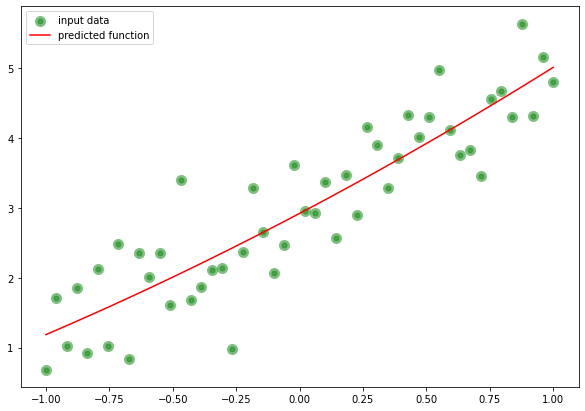

In [3]:
#определяем нашу независимую переменную
X = np.linspace(-1,1,50)
#и зависимую переменную
y_array = np.array([2 * (x + np.random.normal(0,0.25)) + 3 for x in X]).reshape(-1,1)
#формуруем матрицу признаков(design matrix) для обучения - не забываем добавить вектор 1, коэфициент при котором будет соответсвовать смещению
x_array = np.array([X**0, X**1, X**2]).T

#обучение модели
ols = OrdinaryLeastSquares()
ols.fit(x_array, y_array)

predictions = ols.predict(x_array)
print('Веса функции: ', ols.weights)

#визуализация предсказания и исходных данных
plt.scatter(X, y_array, label='input data', c = 'g',linewidths=5, alpha=0.5)
plt.plot(X, predictions, color='r',label='predicted function')
plt.legend()

### Решение итеративным способом аппроксимации квадратичной функции линейной регрессией

y_array:  (50, 1)
Weights:  [[5.00305040e+00]
 [4.96199473e-03]
 [9.56934759e-01]]
Number of iters:  10096


Text(0.5, 1.0, 'График ошибки')

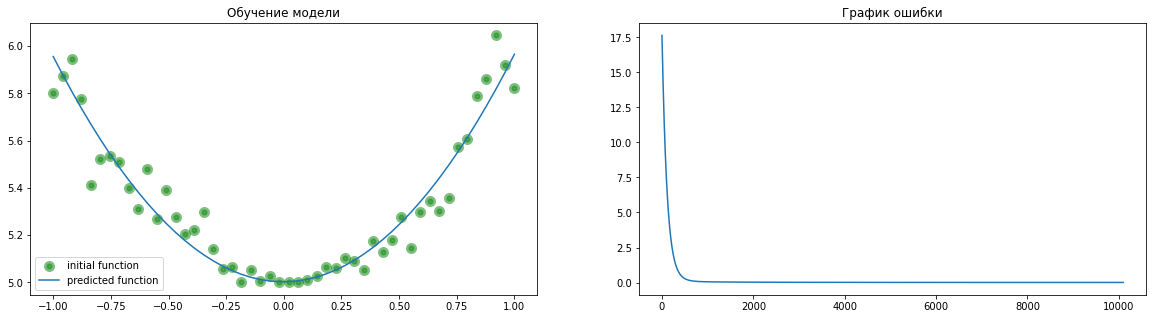

In [4]:
class IterativeLinearRegression:
    def __init__(self, learning_rate, iters):
        """
        Конструктор класса для итеративной линейной регрессии.

        Parameters:
        learning_rate (float): Скорость обучения (шаг градиентного спуска).
        iters (int): Максимальное количество итераций для обучения.

        Attributes:
        iters (int): Количество итераций.
        learning_rate (float): Скорость обучения.
        tol (float): Порог сходимости для разницы нормы весов между итерациями.
        weights (numpy.ndarray): Веса модели после обучения.
        """
        self.iters = iters
        self.learning_rate = learning_rate
        self.tol = 1e-5

    def fit_with_while(self, X, y):
        """
        Обучение линейной регрессии численным методом с использованием итераций до сходимости.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        list: Список значений функции потерь на каждой итерации.
        """
        loss_list = []
        weights_list = []
        
        self.weights = np.random.rand(X.shape[1], 1)
        weights_list.append(self.weights)

        loss_grad = self.loss_grad(X, y)
        step = self.learning_rate * loss_grad / len(X)
        self.weights = self.weights - step
        weights_list.append(self.weights)

        i = 1
        while np.linalg.norm(weights_list[i] - weights_list[i - 1]) > self.tol:
            loss_grad = self.loss_grad(X, y)
            step = self.learning_rate * loss_grad / len(X)
            self.weights = self.weights - step
            loss = self.loss(X, y)
            loss_list.append(loss)
            weights_list.append(self.weights)
            i += 1
        return loss_list

    def fit(self, X, y):
        """
        Обучение линейной регрессии численным методом с использованием указанного количества итераций.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        list: Список значений функции потерь на каждой итерации.
        """
        loss_list = []
        weights_list = []
        self.weights = np.random.rand(X.shape[1], 1)
        
        for _ in range(self.iters):
            loss_grad = self.loss_grad(X, y)
            step = self.learning_rate * loss_grad / len(X)
            self.weights = self.weights - step
            loss = self.loss(X, y)
            loss_list.append(loss)
        return loss_list

    def predict(self, X):
        """
        Выполнение предсказаний с использованием обученных весов.

        Parameters:
        X (numpy.ndarray): Матрица признаков для предсказания.

        Returns:
        numpy.ndarray: Предсказанные значения.
        """
        return np.dot(X, self.weights)

    def loss(self, X, y):
        """
        Вычисление среднеквадратичной ошибки.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        float: Среднеквадратичная ошибка.
        """
        y_hat = np.dot(X, self.weights)
        loss = 1 / len(X) * np.sum((y_hat - y) ** 2)
        return loss

    def loss_grad(self, X, y):
        """
        Вычисление градиента среднеквадратичной ошибки.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        numpy.ndarray: Градиент среднеквадратичной ошибки.
        """
        y_hat = np.dot(X, self.weights)
        loss_gradient = 2 / len(X) * np.dot(X.T, (y_hat - y))
        return loss_gradient

    

X = np.linspace(-1,1,50)

y_array = np.array([(x + np.random.normal(0,0.08))**2 + 5 for x in X]).reshape(-1,1)

print('y_array: ', y_array.shape)

x_array = np.array([X**0, X**1, X**2]).T

ilr = IterativeLinearRegression(learning_rate=0.1, iters=1000)
train_history = ilr.fit_with_while(x_array, y_array)
print('Weights: ', ilr.weights)
print('Number of iters: ', len(train_history))

predictions = ilr.predict(x_array)

# визуализация предсказания и процесса обучения
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.scatter(X, y_array, label='initial function', c = 'g',linewidths=5, alpha=0.5)
ax1.plot(X, predictions, label='predicted function')

ax1.set_title('Обучение модели')
ax1.legend()

ax2.plot(np.arange(len(train_history)), train_history)
ax2.set_title('График ошибки')

### Работа с датасетом

In [5]:
# чтение данных с поомощью pandas
df = pd.read_csv('bike.csv')
# определение признаков для работы
feature_names = ['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']
# нормализация признаков
scaled_df = df[feature_names].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
scaled_df['count'] = df['count'].tolist()
scaled_df.head()

,holiday,humidity,summer,temp,windspeed,workingday,count
0,-0.156786,0.987606,-0.914784,-0.925973,0.926255,0.68378,2
1,-0.156786,-0.307982,1.092789,-0.043565,0.353309,0.68378,157
2,-0.156786,-0.979769,1.092789,2.309524,0.124745,0.68378,233
3,-0.156786,1.323500,1.092789,0.446662,0.582641,0.68378,98
4,-0.156786,0.651713,-0.914784,-1.416200,-0.905330,0.68378,6


### Оценка признаков

In [6]:
from scipy.stats import ncf, f


def calculate_significance(y_true, y_preds, coefs_num):
    """
    Рассчитывает статистики и коэффициент детерминации для оценки значимости регрессионной модели.

    Parameters:
    y_true (numpy.ndarray): Наблюдаемые значения (реальные значения).
    y_preds (numpy.ndarray): Предсказанные значения регрессионной модели.
    coefs_num (int): Количество коэффициентов (параметров) в модели.

    Returns:
    dict: Словарь с вычисленными статистиками, включая p-значение (p-value), F-статистику, коэффициент детерминации (r_squared) и скорректированный коэффициент детерминации (adj_r_squared).
    """
    # Увеличиваем количество коэффициентов на 1, чтобы учесть смещение (bias).
    coefs_num += 1
    
    # Вычисляем сумму квадратов отклонений между реальными и предсказанными значениями.
    ss_reg = ((y_true - y_preds) ** 2).sum(axis=0)
    
    # Вычисляем сумму квадратов отклонений между реальными значениями и их средним значением.
    ss_mean = ((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0)
    
    # Вычисляем коэффициент детерминации (R^2).
    r_squared = (ss_mean - ss_reg) / ss_mean
    
    # Вычисляем скорректированный коэффициент детерминации (adjusted R^2).
    adj_r_squared = 1 - (len(y_true) - 1) / (len(y_true) - coefs_num - 1) * (1 - r_squared)
    
    # Вычисляем степени свободы для F-статистики.
    df1 = (coefs_num - 1)
    df2 = (len(y_true) - coefs_num)

    # Вычисляем числитель и знаменатель для F-статистики.
    numerator = r_squared / df1
    denominator = (1 - r_squared) / df2
    
    # Вычисляем значение F-статистики.
    F = numerator / denominator

    # Вычисляем p-значение (area to the right in pdf) для F-статистики.
    p_value = 2*min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

    # Возвращаем результаты в виде словаря.
    return {'p-value': p_value, 'F stat': F, 'r_squared': r_squared, 'adj_r_squared': adj_r_squared}


In [7]:
# формирование данных для обучения
bias_term = np.ones((len(scaled_df), 1))#добавляем признак из 1 - вектор смещения
x_array = np.concatenate([bias_term, np.array(scaled_df[feature_names])], axis=1)
y_array = np.array(scaled_df['count']).reshape(-1,1)

Number of iters:  129316


{'p-value': array([2.22044605e-16]),
 'F stat': array([270.26753437]),
 'r_squared': array([0.35140714]),
 'adj_r_squared': array([0.34988971])}

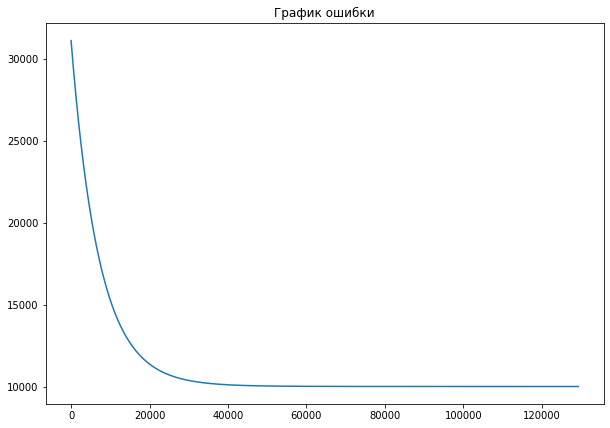

In [8]:
ilr = IterativeLinearRegression(learning_rate=0.1, iters=100000)
train_history = ilr.fit_with_while(x_array, y_array)
predictions = ilr.predict(x_array)

print('Number of iters: ', len(train_history))

#визуализация процесса обучения
plt.plot(np.arange(len(train_history)), train_history)
plt.title('График ошибки')


calculate_significance(y_array, predictions, x_array.shape[1] - 1)

In [9]:
#подобранные веса
print('ILR weights: ', ilr.weights)

ILR weights:  [[125.59041324]
 [  3.19580732]
 [-28.81585671]
 [ 11.49886226]
 [ 61.1957024 ]
 [  2.93554214]
 [ -0.23503196]]


In [10]:
ols = OrdinaryLeastSquares()
ols.fit(x_array, y_array)
ols_predictions = ols.predict(x_array)

calculate_significance(y_array, ols_predictions, x_array.shape[1] - 1)

{'p-value': array([2.22044605e-16]),
 'F stat': array([270.27116414]),
 'r_squared': array([0.3514102]),
 'adj_r_squared': array([0.34989278])}

In [11]:
print('OLS weights: ', ols.weights)

OLS weights:  [[125.613     ]
 [  3.18559433]
 [-28.70572394]
 [ 11.28355533]
 [ 61.39632906]
 [  2.96481203]
 [ -0.21574707]]


### Исследование мультиколлинеарности

In [12]:
import random

def feature_generator(curr_df, feature_list):
    """
    Генерируем случайный линейно зависимый признак из нашего датафрейма
    """
    random_coll = random.sample(feature_list, 2)
    new_feature = random.choice([
        curr_df[random_coll[0]] + curr_df[random_coll[1]],
        2 * curr_df[random_coll[0]],
        curr_df[random_coll[0]] - curr_df[random_coll[1]],
        2 * curr_df[random_coll[0]] + curr_df[random_coll[1]]
    ])
    new_feature = 2 * curr_df[random_coll[0]] + 1e-3
    return new_feature

Суть эксперимента - проверить OLS модель при обучении с линейно-зависимыми признаками. 
Для этого на протяжении 10 экспериментов генерируем с помощью функции **feature_generator** линейно зависимый признак от исходных признаков и добавляем ее в наш датафрейм. Далее обучаем модель и смотрим на норму весов и ошибку модели. Мы ожидаем увидеть сильную флуктуацию в весах модели и в ошибке на тестовой выборке. Это покажет нам неустойчивость OLS модели к мультиколлинеарности.

In [66]:
from numpy import linalg
from tqdm import tqdm
from copy import deepcopy

original_features = ['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']
train_features = ['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']

original_features = ['temp', 'windspeed']
train_features = ['temp', 'windspeed']


scaled_df_copy = deepcopy(scaled_df)

total_experiements = 5

weights_norm_list = []
error_list = []
r_squared_list = []
iters_amount_list = []


for i in tqdm(range(total_experiements)):
    if i >= 1:
        feature_name = f'new_feature_{i}'
        scaled_df_copy[feature_name] = feature_generator(scaled_df_copy, original_features)
        train_features.append(feature_name)
    # print(train_features)

    # делим нашу выборку на обучающую и тестовую
    X_train, X_test, y_train, y_test = train_test_split(scaled_df_copy[train_features], scaled_df_copy['count'], random_state=42)

    # подготавливаем обучающую выборку
    bias_term = np.ones((len(X_train), 1))
    x_train = np.concatenate([bias_term, X_train], axis=1)
    y_train = np.array(y_train).reshape(-1,1)
    
    # подготавливаем тествую выборку
    bias_term = np.ones((len(X_test), 1))
    x_test = np.concatenate([bias_term, X_test], axis=1)
    y_test = np.array(y_test).reshape(-1,1)

    # ilr = IterativeLinearRegression(learning_rate=0.1, iters=100000)
    # train_history = ilr.fit_with_while(x_train, y_train)
    # predictions = ilr.predict(x_test)
    
    # обучаем аналитическим методом линейную регрессию
    ols = OrdinaryLeastSquares()
    ols.fit(x_train, y_train)
    train_preds = ols.predict(x_train)
    test_preds = ols.predict(x_test)

    # рассчитываем среднее весов
    weights_sum = np.mean(np.abs(ols.weights))
    # рассчитываем ошибку модели на тестовой выборке
    mse_error = 1/len(x_test) * np.sum((test_preds - y_test)**2)
    # print(calculate_significance(y_test, test_preds, x_test.shape[1] - 1))
    r_squared = calculate_significance(y_train, train_preds, x_train.shape[1] - 1)['adj_r_squared']

    r_squared_list.append(r_squared)
    weights_norm_list.append(weights_sum)
    error_list.append(mse_error)
    iters_amount_list.append(len(train_history))
    
    # print()

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 165.23it/s]


Мы видим, что ошибка и веса действительно начинают флуктуировать. А коэфициент детерминации явно показывает сильное переобучение модели.

Text(0.5, 1.0, '$R^2$')

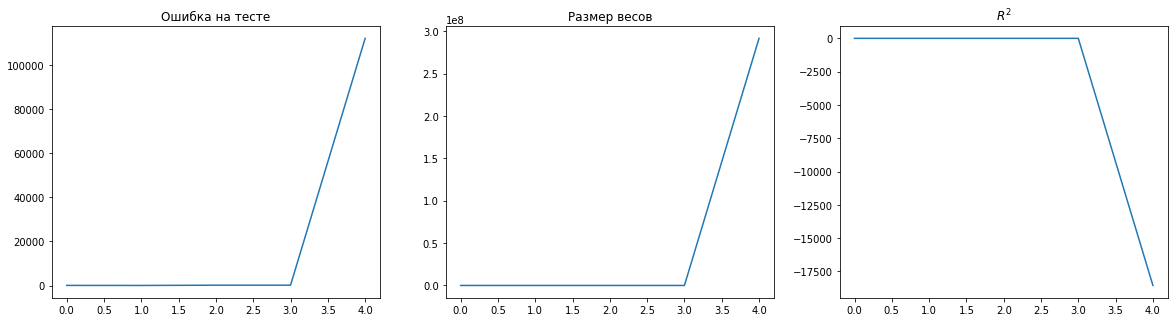

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax1.plot(list(range(total_experiements)), weights_norm_list)
ax1.set_title('Ошибка на тесте')

ax2.plot(list(range(total_experiements)), error_list)
ax2.set_title('Размер весов')

ax3.plot(list(range(total_experiements)), r_squared_list)
ax3.set_title('$R^2$')

### Интерпретируемое машинное обучение

На практике, линейную регрессию сам никто не пишет - используют готовые библиотеки. Так как ключевое свойство линейных моделей - интерпретируемость и возможность оценивать наш уровень доверия к таким моделям, нам необходимо множество статистик и метрик, которые позволят нам достаточно точно оценить качесвто нашей модели. Ключевой библиотекой с реализованными линейными моделями является **statmodels**.

In [15]:
#формирование данных для модели
x_array = scaled_df[feature_names]
#добавление вектора смещения
x_array = sm.add_constant(x_array)
y_array = scaled_df['count']

#обучение модели, hasconst - то что мы добавили вектор смещения в модель
ols_model = sm.OLS(y_array, x_array, hasconst=True)
results = ols_model.fit()

#описание интерпретации таблички 
#https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/
results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     270.3
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          5.70e-277
Time:                        13:12:56   Log-Likelihood:                -18074.
No. Observations:                3000   AIC:                         3.616e+04
Df Residuals:                    2993   BIC:                         3.620e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.6130      1.829     68.680      0.000     122.027     129.199
holiday        3.1856      1.883      1.692      0.091      -0.506       6.878
humidity     -28.7057      1.989    -14.430      0.000     -32.606     -24.805
summer        11.2836      2.128      5.302      0.000       7.111      15.456
temp          61.3963      2.082     29.493      0.000      57.315      65.478
windspeed      2.9648      1.910      1.552      0.121      -0.780       6.709
workingday    -0.2157      1.890     -0.114      0.909      -3.922       3.490
==============================================================================
Omnibus:                      378.392   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.267
Skew:                           0.886   Prob(JB):                    2.46e-129
Kurtosis:                       4.264   Cond. No.                         1.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Практикум

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [24]:
!curl -O https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!curl -O https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  449k  100  449k    0     0   799k      0 --:--:-- --:--:-- --:--:--  803k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  440k  100  440k    0     0   831k      0 --:--:-- --:--:-- --:--:--  836k


In [25]:
df = pd.read_csv('house_prices_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
num_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal', 'MoSold', 'YrSold']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df[num_features], df['SalePrice'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1168, 32), (292, 32))

### Сделайте стандартизацию/заполните пустые значения/исследуйте на выбросы данные признаков обучающей и тестовой выборки(3 балл)

In [35]:
def analyze_missing_values(X_train, X_test):
    train_missing = X_train.isnull().sum()
    test_missing = X_test.isnull().sum()
    
    train_missing_percent = (train_missing / len(X_train)) * 100
    test_missing_percent = (test_missing / len(X_test)) * 100
    
    missing_df = pd.DataFrame({
        'Train Missing Count': train_missing,
        'Train Missing %': train_missing_percent,
        'Test Missing Count': test_missing,
        'Test Missing %': test_missing_percent
    })
    
    return missing_df[missing_df['Train Missing Count'] > 0]

def fill_missing_values(X_train, X_test):
    X_train_filled = X_train.copy()
    X_test_filled = X_test.copy()
    
    for column in X_train.columns:
        median_value = X_train[column].median()
        X_train_filled[column] = X_train_filled[column].fillna(median_value)
        X_test_filled[column] = X_test_filled[column].fillna(median_value)
    
    return X_train_filled, X_test_filled

def analyze_outliers(X_train):
    plt.figure(figsize=(20, 15))
    
    n_features = len(X_train.columns)
    n_rows = (n_features + 2) // 3  # 3 графика в ряд
    
    for i, column in enumerate(X_train.columns, 1):
        plt.subplot(n_rows, 3, i)
        sns.boxplot(x=X_train[column])
        plt.title(column, fontsize=12)
        plt.xticks(rotation=45)
    
    plt.tight_layout(pad=3.0)
    plt.show()

    print("\nOutliers Summary:")
    for column in X_train.columns:
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = X_train[(X_train[column] < (Q1 - 1.5 * IQR)) | 
                          (X_train[column] > (Q3 + 1.5 * IQR))][column]
        print(f"\n{column}:")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Outlier values range: [{outliers.min():.2f}, {outliers.max():.2f}]")

def handle_outliers(X_train, X_test):
    X_train_clean = X_train.copy()
    X_test_clean = X_test.copy()
    
    for column in X_train.columns:
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        X_train_clean[column] = X_train_clean[column].clip(lower_bound, upper_bound)
        X_test_clean[column] = X_test_clean[column].clip(lower_bound, upper_bound)
    
    return X_train_clean, X_test_clean

def standardize_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )
    return X_train_scaled, X_test_scaled

In [33]:
def preprocess_data(X_train, X_test):
    print("Missing Values Analysis:")
    print(analyze_missing_values(X_train, X_test))
    print("\n")
    
    X_train_filled, X_test_filled = fill_missing_values(X_train, X_test)
    
    print("Analyzing outliers (see boxplots):")
    analyze_outliers(X_train_filled)
    
    X_train_clean, X_test_clean = handle_outliers(X_train_filled, X_test_filled)
    
    X_train_scaled, X_test_scaled = standardize_data(X_train_clean, X_test_clean)
    
    return X_train_scaled, X_test_scaled

Missing Values Analysis:
             Train Missing Count  Train Missing %  Test Missing Count  \
LotFrontage                  217        18.578767                  42   
MasVnrArea                     6         0.513699                   2   
GarageYrBlt                   64         5.479452                  17   

             Test Missing %  
LotFrontage       14.383562  
MasVnrArea         0.684932  
GarageYrBlt        5.821918  


Analyzing outliers (see boxplots):


/var/folders/73/jqt5mn7n7k71y8ctq0n8xhpr0000gn/T/ipykernel_2145/3228784226.py:40: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


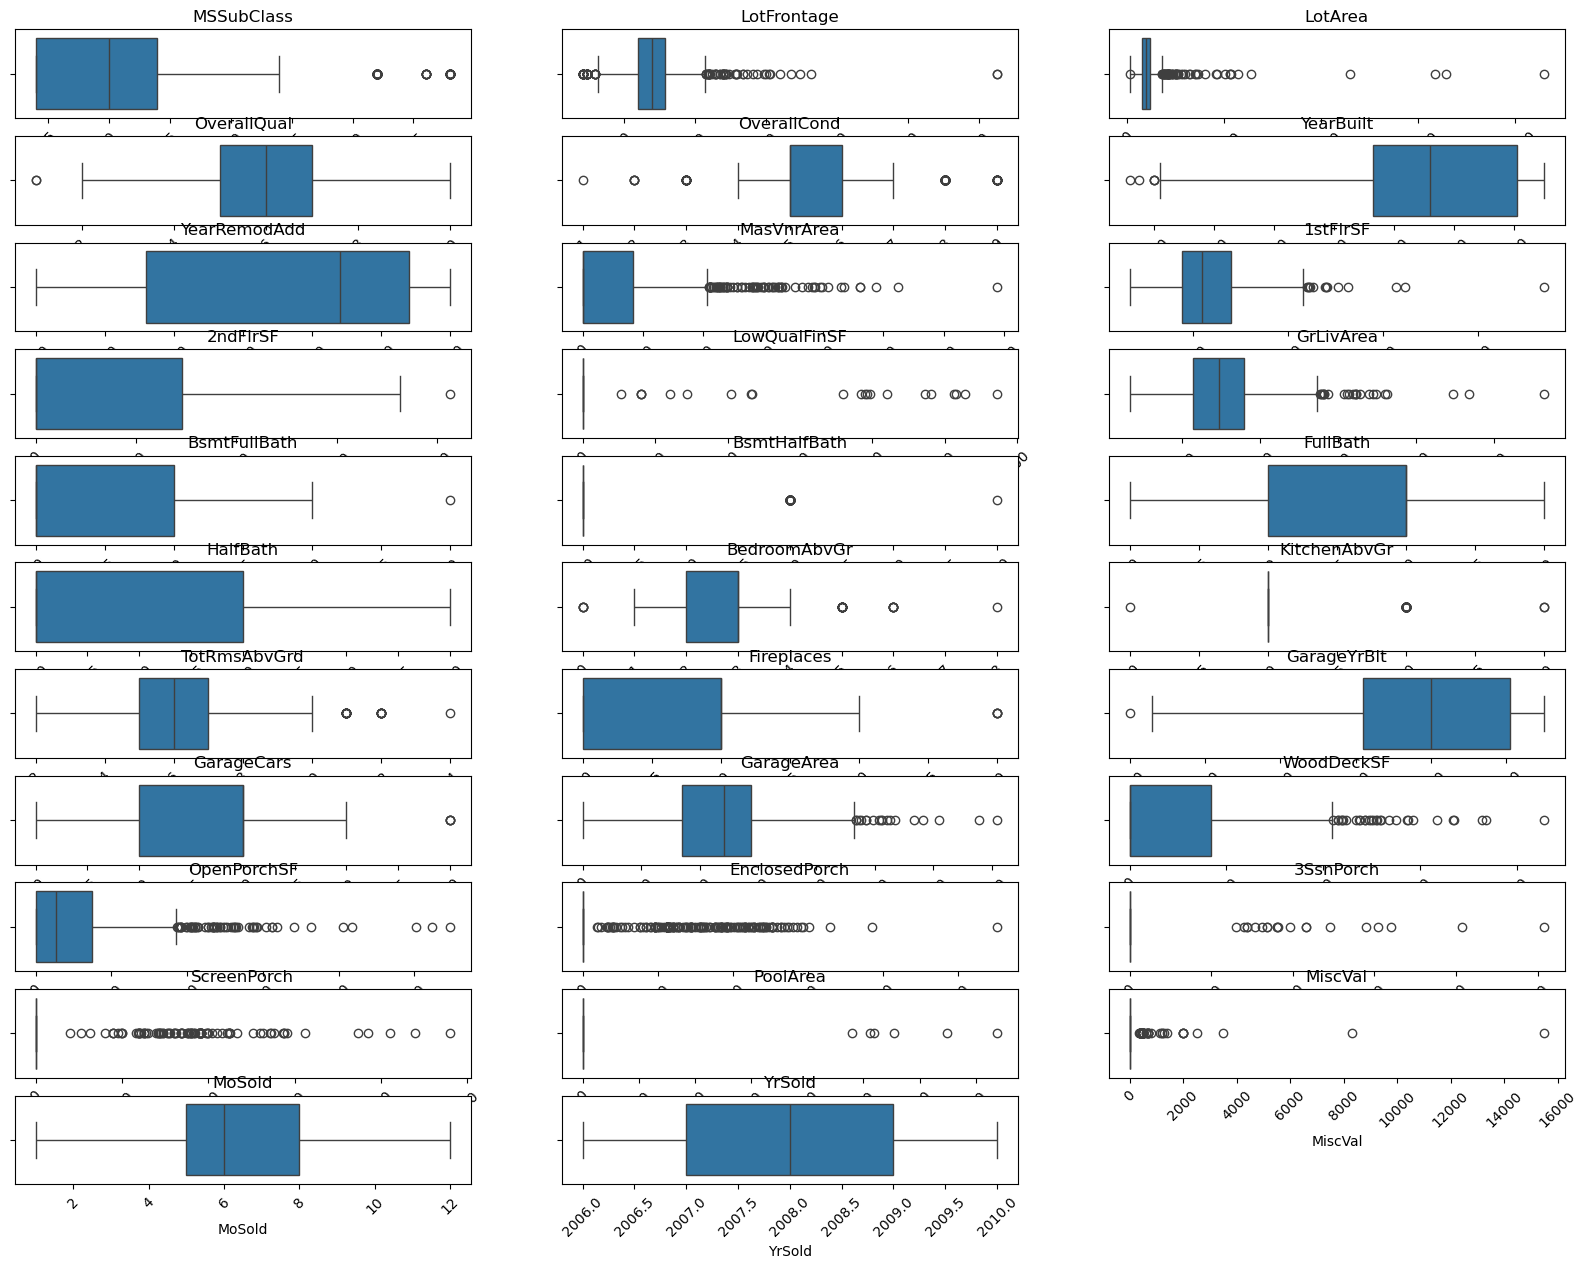


Outliers Summary:

MSSubClass:
Number of outliers: 84
Outlier values range: [160.00, 190.00]

LotFrontage:
Number of outliers: 85
Outlier values range: [21.00, 313.00]

LotArea:
Number of outliers: 54
Outlier values range: [1300.00, 215245.00]

OverallQual:
Number of outliers: 2
Outlier values range: [1.00, 1.00]

OverallCond:
Number of outliers: 99
Outlier values range: [1.00, 9.00]

YearBuilt:
Number of outliers: 5
Outlier values range: [1872.00, 1880.00]

YearRemodAdd:
Number of outliers: 0

MasVnrArea:
Number of outliers: 77
Outlier values range: [420.00, 1378.00]

1stFlrSF:
Number of outliers: 13
Outlier values range: [2196.00, 4692.00]

2ndFlrSF:
Number of outliers: 1
Outlier values range: [2065.00, 2065.00]

LowQualFinSF:
Number of outliers: 21
Outlier values range: [53.00, 572.00]

GrLivArea:
Number of outliers: 23
Outlier values range: [2775.00, 5642.00]

BsmtFullBath:
Number of outliers: 1
Outlier values range: [3.00, 3.00]

BsmtHalfBath:
Number of outliers: 66
Outlier value

In [37]:
X_train_processed, X_test_processed = preprocess_data(X_train, X_test)

print("\nDescriptive statistics after preprocessing:")
print("\nTraining data:")
print(X_train_processed.describe())
print("\nTest data:")
print(X_test_processed.describe())

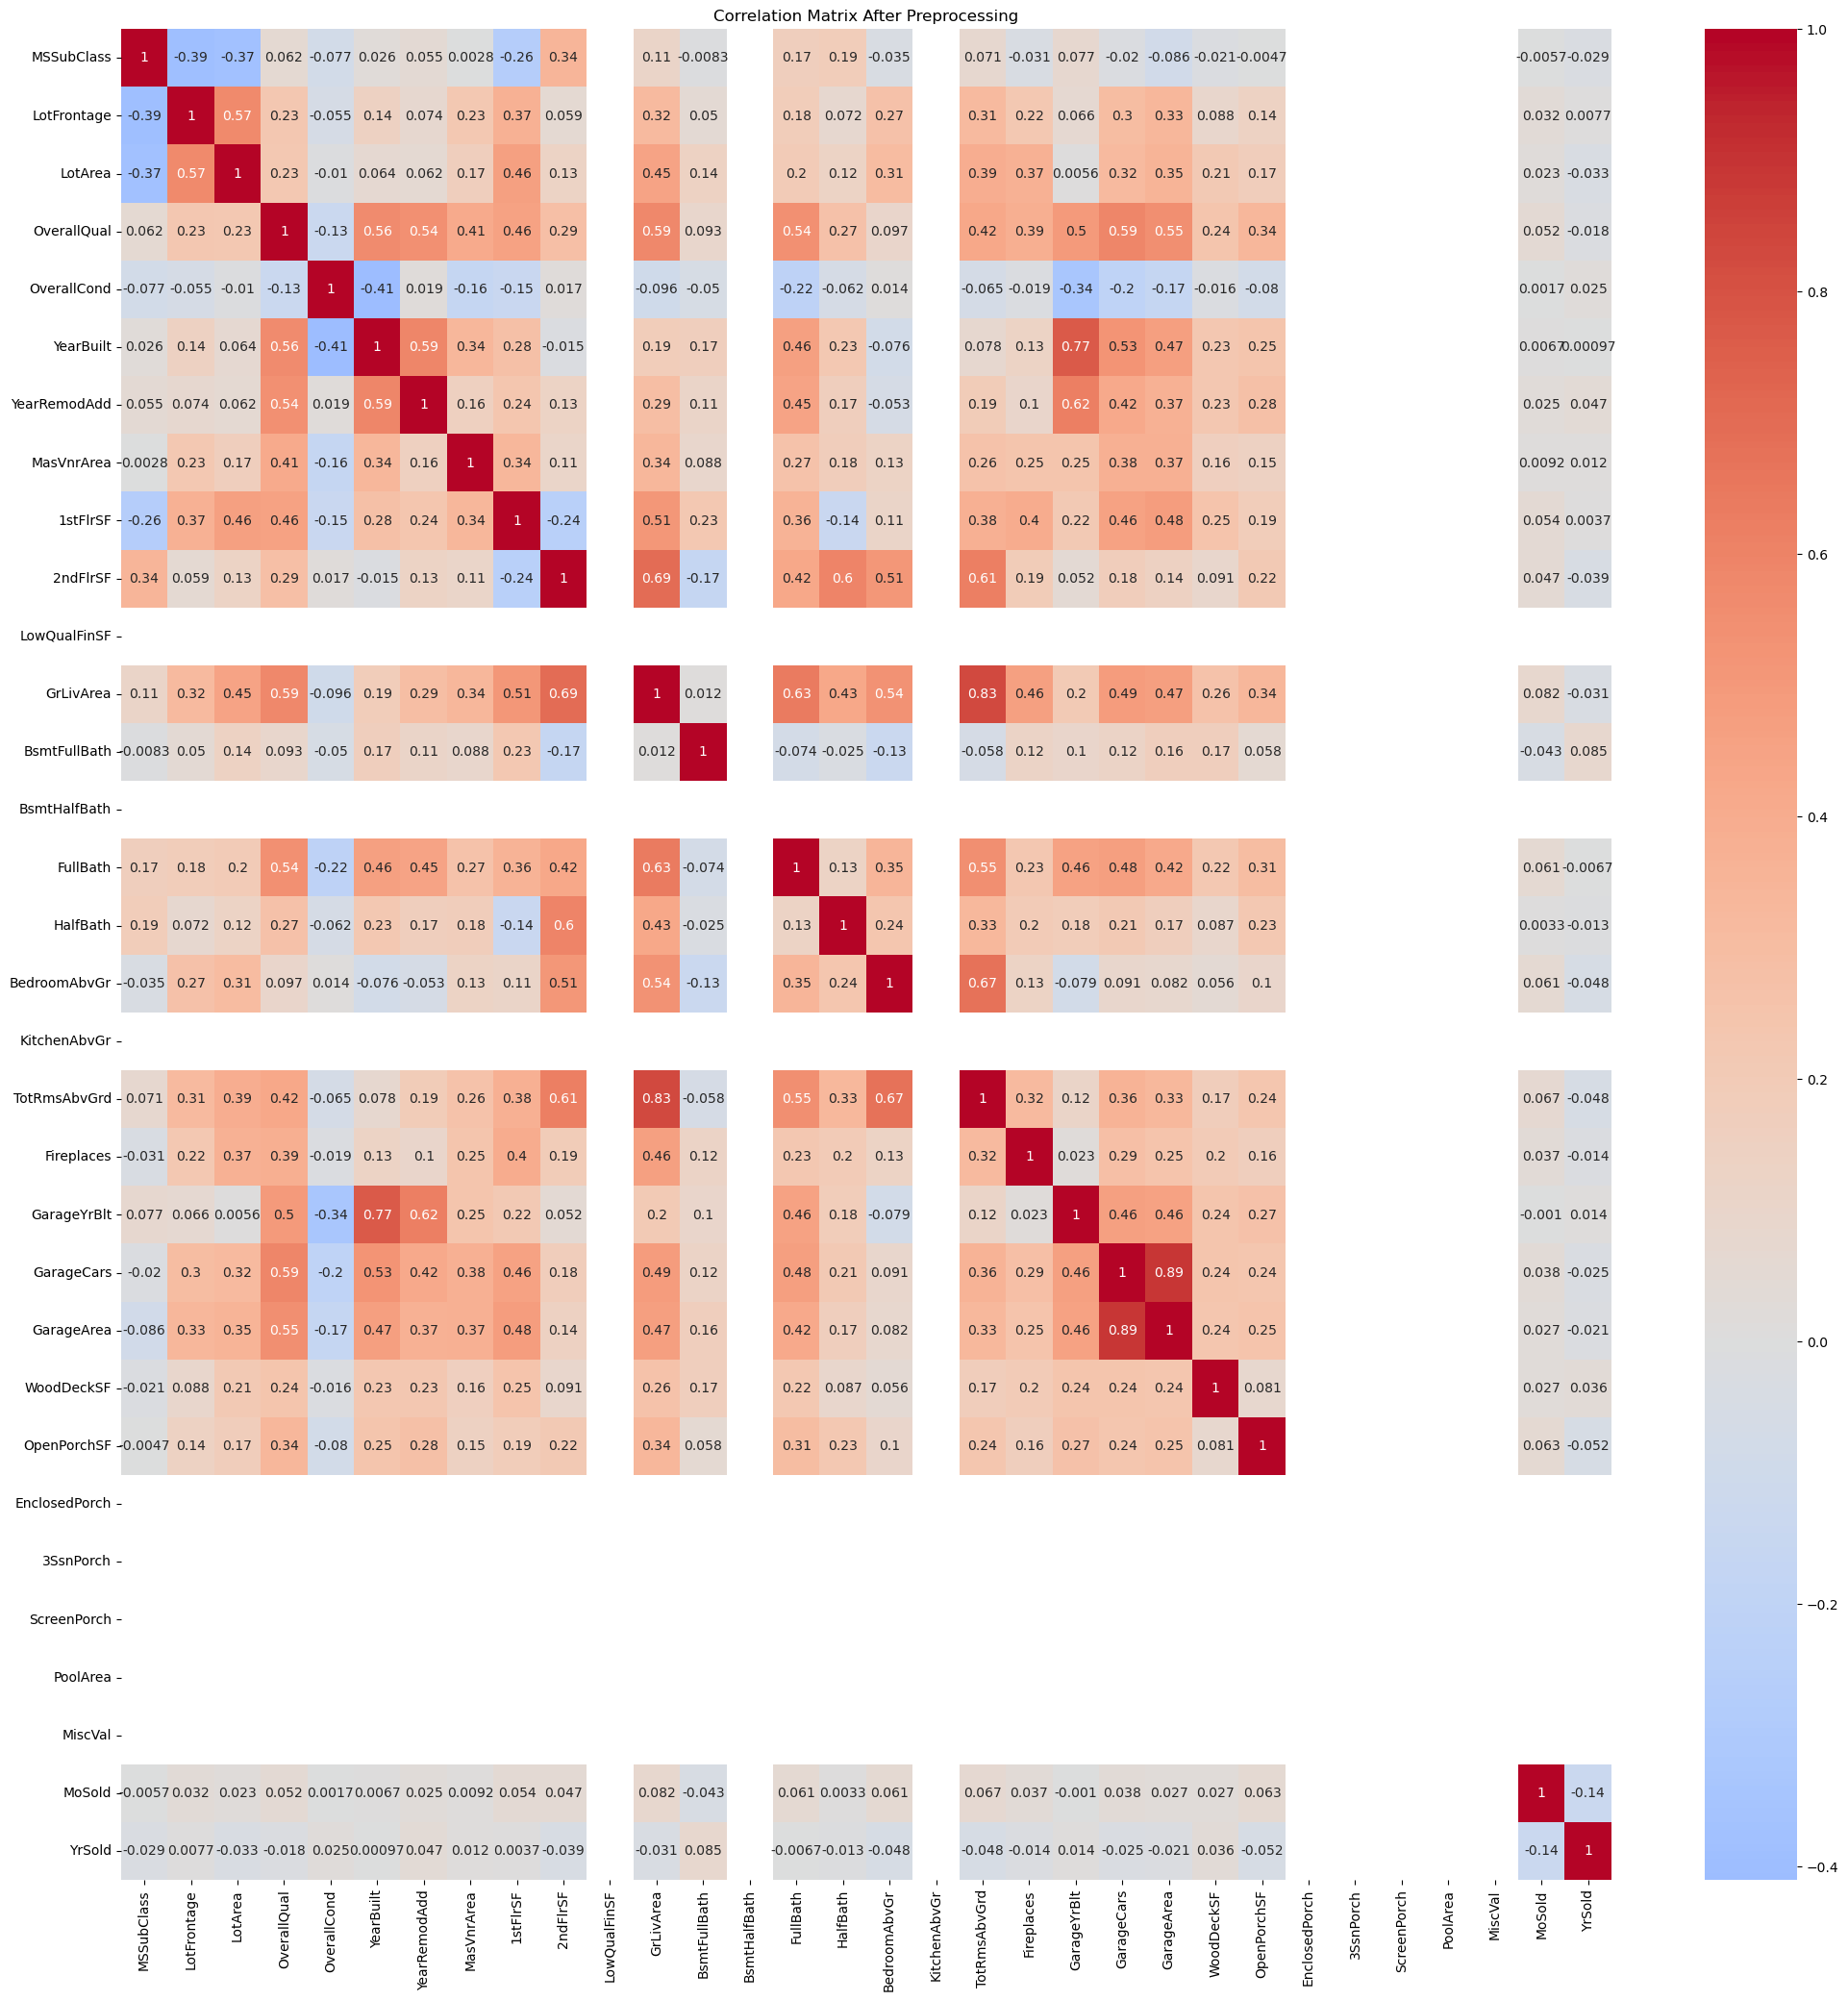

In [39]:
plt.figure(figsize=(25, 25))
sns.heatmap(X_train_processed.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix After Preprocessing')
plt.show()

### Воспользоваться методом OLS библиотеки statsmodels для рассчета коэфициентов линейной регрессии (1 балл)

In [40]:
import statsmodels.api as sm

In [41]:
X_train_const = sm.add_constant(X_train_processed)
X_test_const = sm.add_constant(X_test_processed)

model = sm.OLS(y_train, X_train_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     215.8
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:14:08   Log-Likelihood:                -13804.
No. Observations:                1168   AIC:                         2.766e+04
Df Residuals:                    1143   BIC:                         2.778e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.814e+05    971.376    186.788

### Note!!!
Мы видим довольно большие коэффициенты для признаков, однако они большие, т.к. таргет измеряется в тысячах долларов.

Т.е. все ок :)

In [42]:
y_train_pred = results.predict(X_train_const)
y_test_pred = results.predict(X_test_const)

top_features = pd.DataFrame({
    'Feature': results.model.exog_names,
    'Coefficient': results.params,
    't-statistic': results.tvalues,
    'p-value': results.pvalues
}).sort_values(by='t-statistic', key=abs, ascending=False).head()

print("\nТоп-5 самых значимых признаков:")
print(top_features)


Топ-5 самых значимых признаков:
                   Feature    Coefficient  t-statistic       p-value
const                const  181441.541952   186.788135  0.000000e+00
OverallQual    OverallQual   24828.013635    15.371704  1.301651e-48
1stFlrSF          1stFlrSF   34319.850051     7.542284  9.386068e-14
BsmtFullBath  BsmtFullBath    7835.181587     7.294615  5.586097e-13
2ndFlrSF          2ndFlrSF   35604.618653     6.705002  3.158368e-11


### Выберите переменные, которые статистически положительно связаны с ценой на дом. (1 балл) 

In [45]:
feature_analysis = pd.DataFrame({
    'Feature': results.model.exog_names,
    'Coefficient': results.params,
    'p_value': results.pvalues,
    't_statistic': results.tvalues
})

significant_positive_features = feature_analysis[
    (feature_analysis['p_value'] < 0.05) & 
    (feature_analysis['Coefficient'] > 0)
].sort_values(by='t_statistic', ascending=False)

print("Статистически значимые положительные признаки:")
print("\nКоличество признаков:", len(significant_positive_features))
print("\nПризнаки, отсортированные по t-статистике:")
print(significant_positive_features.to_string())

Статистически значимые положительные признаки:

Количество признаков: 12

Признаки, отсортированные по t-статистике:
                   Feature    Coefficient       p_value  t_statistic
const                const  181441.541952  0.000000e+00   186.788135
OverallQual    OverallQual   24828.013635  1.301651e-48    15.371704
1stFlrSF          1stFlrSF   34319.850051  9.386068e-14     7.542284
BsmtFullBath  BsmtFullBath    7835.181587  5.586097e-13     7.294615
2ndFlrSF          2ndFlrSF   35604.618653  3.158368e-11     6.705002
YearBuilt        YearBuilt   10279.131188  3.794146e-07     5.108926
OverallCond    OverallCond    5867.882864  1.022891e-06     4.913909
LotArea            LotArea    5782.694471  4.380104e-05     4.102331
GarageCars      GarageCars    6049.868229  1.079197e-02     2.553552
MasVnrArea      MasVnrArea    2667.372337  1.926410e-02     2.343701
Fireplaces      Fireplaces    2684.544197  2.532665e-02     2.239323
GarageYrBlt    GarageYrBlt    3723.409933  3.187869e-02

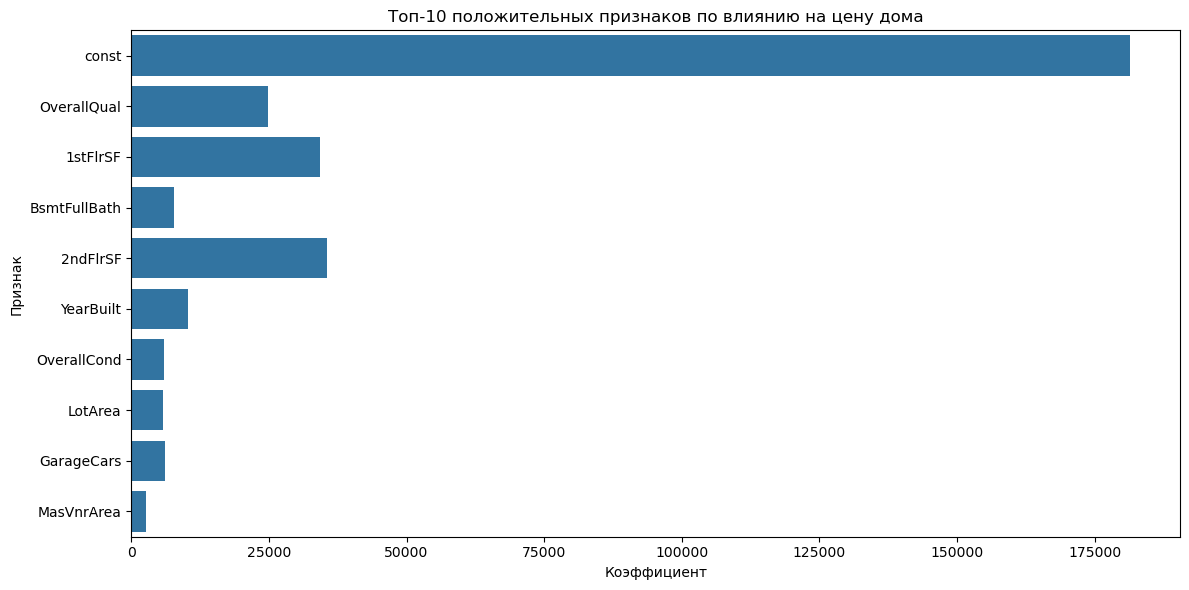

In [46]:
plt.figure(figsize=(12, 6))
top_10_positive = significant_positive_features.head(10)
sns.barplot(x='Coefficient', y='Feature', data=top_10_positive)
plt.title('Топ-10 положительных признаков по влиянию на цену дома')
plt.xlabel('Коэффициент')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

### Оцените модель- метрик $R^2$ на обучении и RMSE на тестовой выборке. Что мы можем сказать по ошибке? (1 балл)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Метрики качества модели:")
print(f"R² на обучающей выборке: {train_r2:.4f}")
print(f"RMSE на тестовой выборке: ${test_rmse:,.2f}")

Метрики качества модели:
R² на обучающей выборке: 0.8192
RMSE на тестовой выборке: $36,167.67


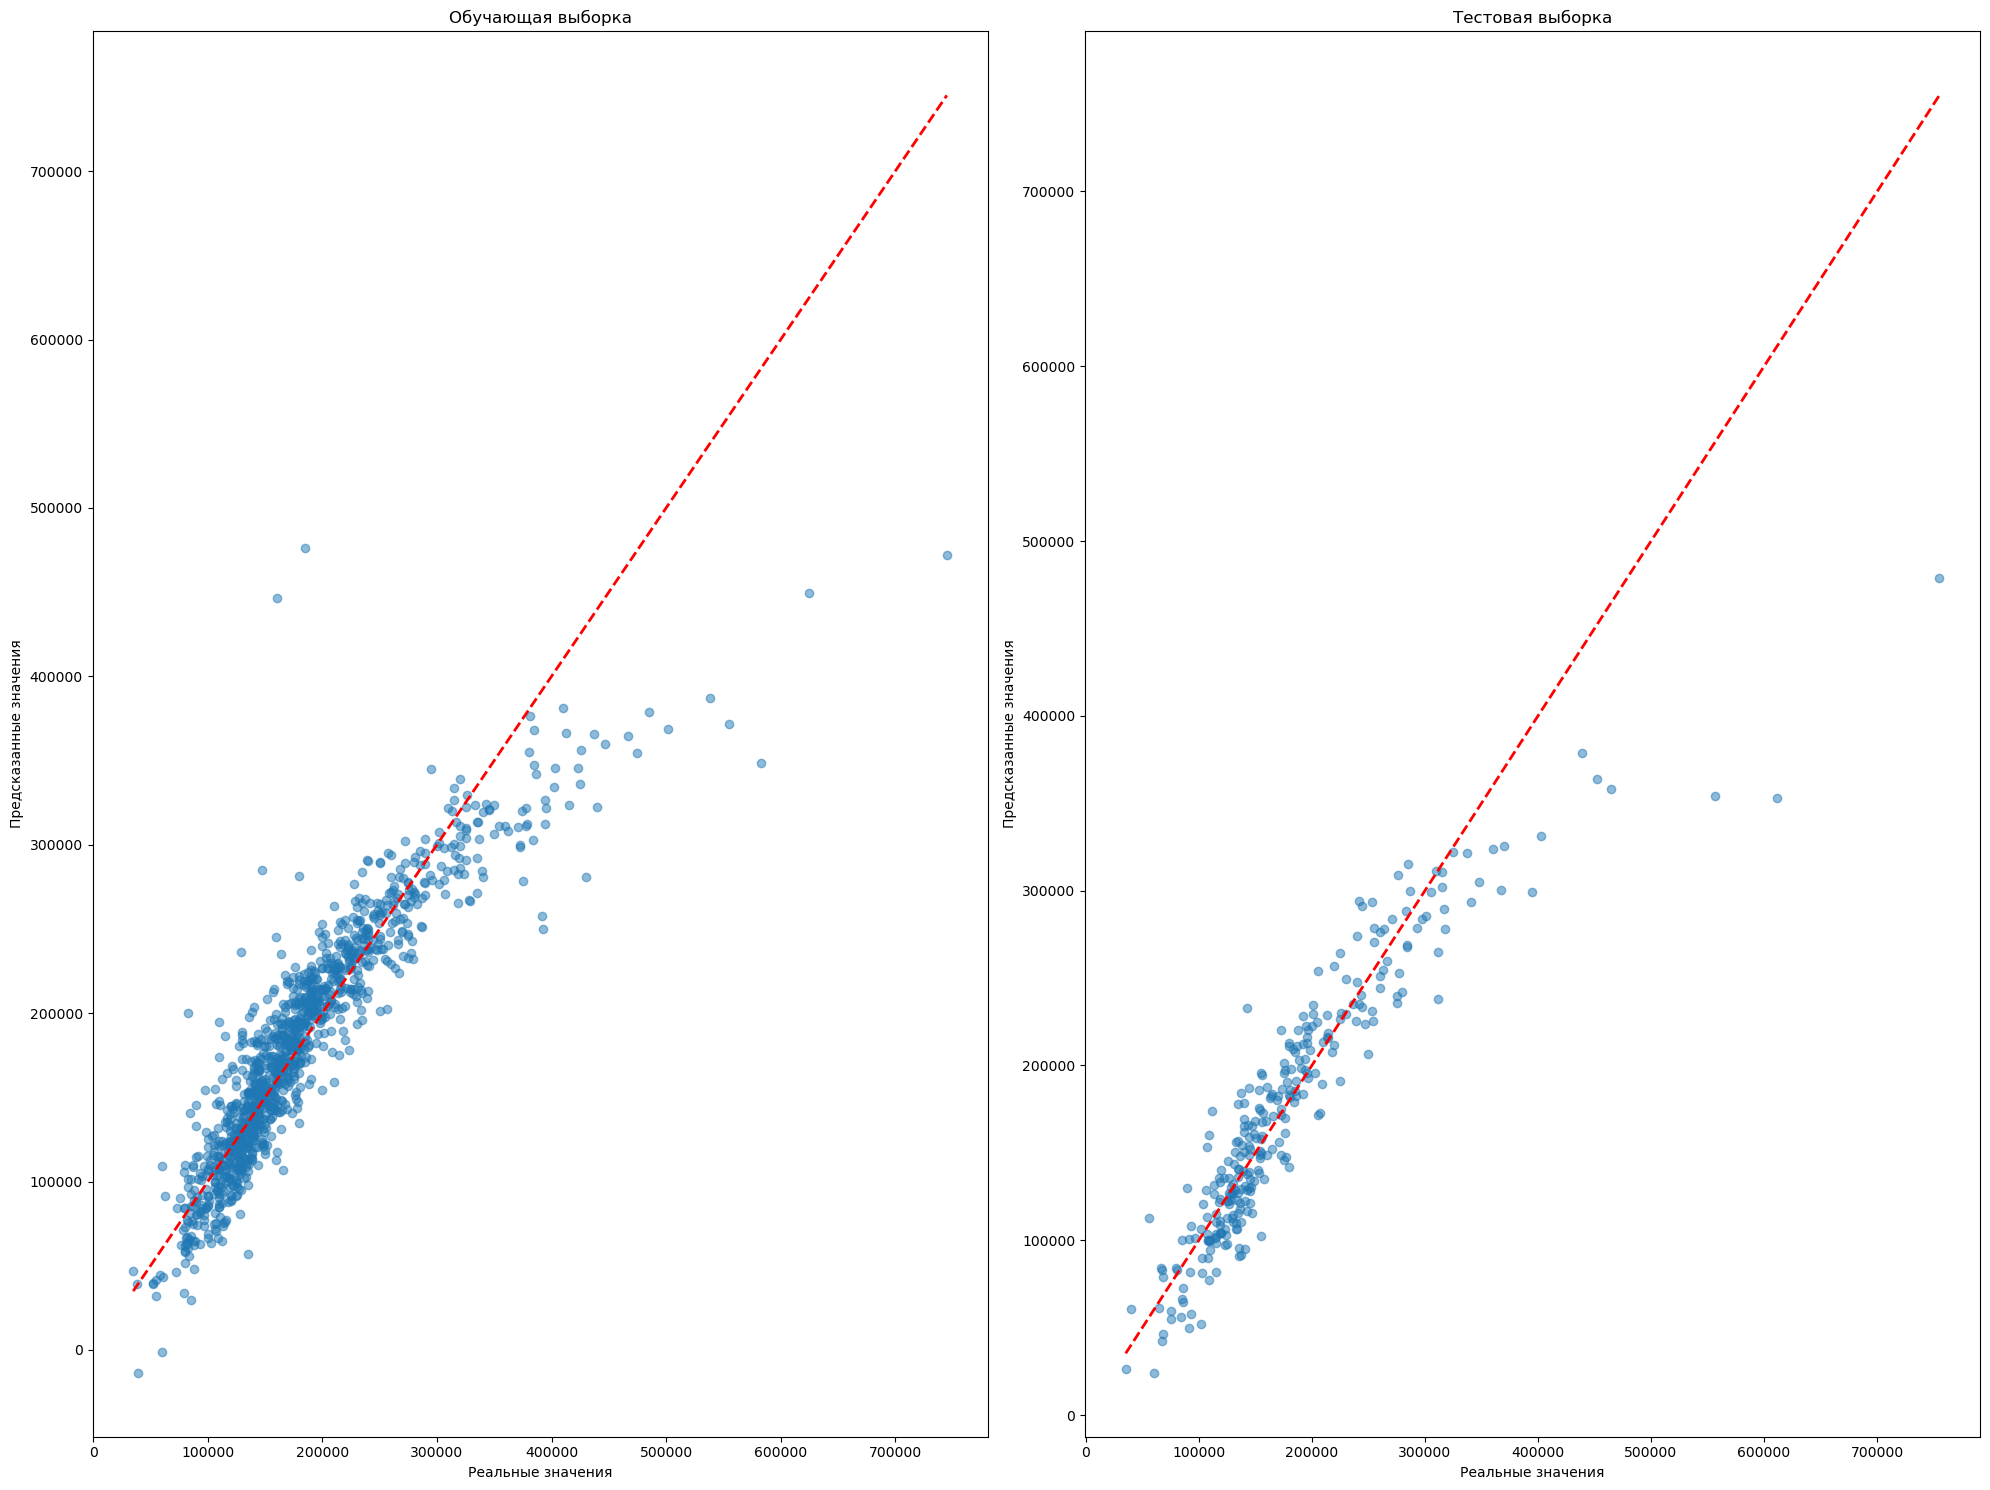

In [52]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Обучающая выборка')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Тестовая выборка')
plt.tight_layout()
plt.show()

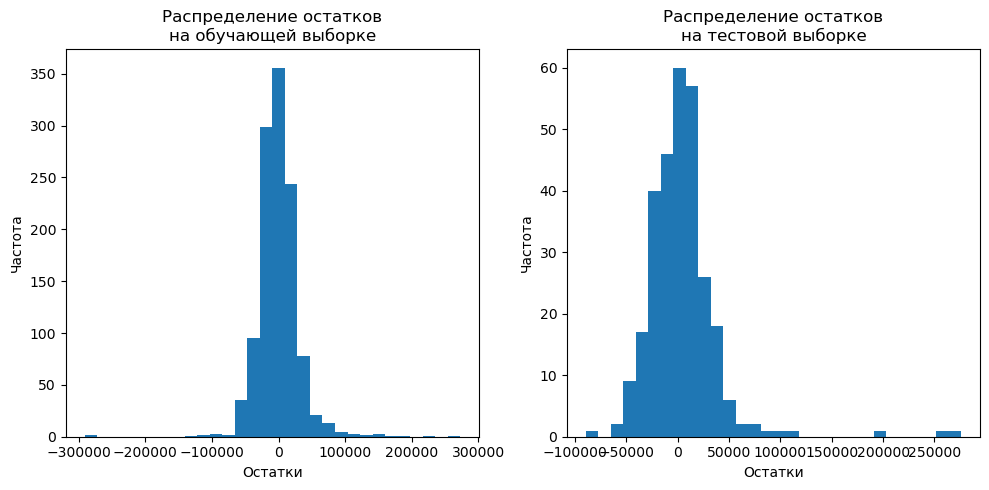

In [53]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=30)
plt.title('Распределение остатков\nна обучающей выборке')
plt.xlabel('Остатки')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(residuals_test, bins=30)
plt.title('Распределение остатков\nна тестовой выборке')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [55]:
print("\nСтатистика остатков:")
print(f"Среднее значение остатков (train): ${residuals_train.mean():,.2f}")
print(f"Стандартное отклонение остатков (train): ${residuals_train.std():,.2f}")
print(f"Среднее значение остатков (test): ${residuals_test.mean():,.2f}")
print(f"Стандартное отклонение остатков (test): ${residuals_test.std():,.2f}")


Статистика остатков:
Среднее значение остатков (train): $-0.00
Стандартное отклонение остатков (train): $32,854.63
Среднее значение остатков (test): $4,351.67
Стандартное отклонение остатков (test): $35,966.57


### Придумайте какой-нибудь хороший новый признак. Смогли ли вы снизить ошибку на обучении за счет него? (0.5 балла)

Я создал три новых признака:
TotalArea - общая площадь дома
HouseAge - возраст дома на момент продажи
TotalBaths - общее количество ванных комнат (с учетом веса половинных ванных)

In [58]:
X_train_new = X_train_processed.copy()
X_test_new = X_test_processed.copy()

X_train_new['TotalArea'] = X_train_new['1stFlrSF'] + X_train_new['2ndFlrSF'] + X_train_new['GrLivArea']
X_test_new['TotalArea'] = X_test_new['1stFlrSF'] + X_test_new['2ndFlrSF'] + X_test_new['GrLivArea']

X_train_new['HouseAge'] = X_train_new['YrSold'] - X_train_new['YearBuilt']
X_test_new['HouseAge'] = X_test_new['YrSold'] - X_test_new['YearBuilt']

X_train_new['TotalBaths'] = X_train_new['FullBath'] + 0.5*X_train_new['HalfBath'] + \
                           X_train_new['BsmtFullBath'] + 0.5*X_train_new['BsmtHalfBath']
X_test_new['TotalBaths'] = X_test_new['FullBath'] + 0.5*X_test_new['HalfBath'] + \
                          X_test_new['BsmtFullBath'] + 0.5*X_test_new['BsmtHalfBath']

In [59]:
X_train_new_const = sm.add_constant(X_train_new)
X_test_new_const = sm.add_constant(X_test_new)

model_new = sm.OLS(y_train, X_train_new_const)
results_new = model_new.fit()

y_train_pred_new = results_new.predict(X_train_new_const)
y_test_pred_new = results_new.predict(X_test_new_const)

In [61]:
print("Сравнение моделей:")
print("\nСтарая модель:")
print(f"R² на обучающей выборке: {r2_score(y_train, y_train_pred)}")
print(f"RMSE на тестовой выборке: ${np.sqrt(mean_squared_error(y_test, y_test_pred))}")

print("\nНовая модель с дополнительными признаками:")
print(f"R² на обучающей выборке: {r2_score(y_train, y_train_pred_new)}")
print(f"RMSE на тестовой выборке: ${np.sqrt(mean_squared_error(y_test, y_test_pred_new))}")

new_features_stats = pd.DataFrame({
    'Feature': results_new.model.exog_names,
    'Coefficient': results_new.params,
    't-statistic': results_new.tvalues,
    'p-value': results_new.pvalues
}).query("Feature in ['TotalArea', 'HouseAge', 'TotalBaths']")

print("\nСтатистика новых признаков:")
print(new_features_stats)

Сравнение моделей:

Старая модель:
R² на обучающей выборке: 0.8191812756032596
RMSE на тестовой выборке: $36167.674842035885

Новая модель с дополнительными признаками:
R² на обучающей выборке: 0.8191812756032597
RMSE на тестовой выборке: $36167.67484203588

Статистика новых признаков:
               Feature   Coefficient  t-statistic       p-value
TotalArea    TotalArea  15202.599249    12.691226  1.269985e-34
HouseAge      HouseAge  -3616.287773    -4.918752  9.984225e-07
TotalBaths  TotalBaths   1910.765435     2.533264  1.143341e-02


Новые признаки почти никак не повлияли на качество модели, однако, они стали статистически значимыми.

### В нашей модели много признаков. Возможно ли нам уменьшить количеcтво признаков, при этом сохранив качество модели? (0.5 балла)

In [62]:
from sklearn.linear_model import LassoCV

In [63]:

X_train_lasso = X_train_processed.copy()    
X_test_lasso = X_test_processed.copy()

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_lasso, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_train_lasso.columns,
    'Coefficient': lasso_cv.coef_
})

In [64]:
important_features = feature_importance[feature_importance['Coefficient'] != 0]
important_features = important_features.sort_values(by='Coefficient', key=abs, ascending=False)

print(f"Изначальное количество признаков: {len(X_train_lasso.columns)}")
print(f"Количество отобранных признаков: {len(important_features)}")
print("\nОтобранные признаки и их коэффициенты:")
print(important_features)

Изначальное количество признаков: 32
Количество отобранных признаков: 20

Отобранные признаки и их коэффициенты:
         Feature   Coefficient
8       1stFlrSF  27400.043755
9       2ndFlrSF  26238.619135
3    OverallQual  25235.807388
5      YearBuilt   9272.895248
12  BsmtFullBath   7767.848041
16  BedroomAbvGr  -6967.828887
0     MSSubClass  -6280.089132
21    GarageCars   5828.499452
2        LotArea   5778.988375
4    OverallCond   5382.145234
20   GarageYrBlt   3438.602643
19    Fireplaces   2579.876347
7     MasVnrArea   2514.242092
6   YearRemodAdd   2445.890083
23    WoodDeckSF   1954.633591
24   OpenPorchSF    856.005844
18  TotRmsAbvGrd    742.359317
30        MoSold   -597.390361
31        YrSold   -281.989228
22    GarageArea    268.686516


In [65]:
selected_features = important_features['Feature'].values
X_train_selected = X_train_lasso[selected_features]
X_test_selected = X_test_lasso[selected_features]

X_train_selected_const = sm.add_constant(X_train_selected)
X_test_selected_const = sm.add_constant(X_test_selected)

model_selected = sm.OLS(y_train, X_train_selected_const)
results_selected = model_selected.fit()

y_train_pred_selected = results_selected.predict(X_train_selected_const)
y_test_pred_selected = results_selected.predict(X_test_selected_const)

print("\nСравнение моделей:")
print("\nПолная модель:")
print(f"R² на обучающей выборке: {r2_score(y_train, y_train_pred)}")
print(f"RMSE на тестовой выборке: ${np.sqrt(mean_squared_error(y_test, y_test_pred))}")

print("\nМодель с отобранными признаками:")
print(f"R² на обучающей выборке: {r2_score(y_train, y_train_pred_selected):.4f}")
print(f"RMSE на тестовой выборке: ${np.sqrt(mean_squared_error(y_test, y_test_pred_selected)):,.2f}")


Сравнение моделей:

Полная модель:
R² на обучающей выборке: 0.8191812756032596
RMSE на тестовой выборке: $36167.674842035885

Модель с отобранными признаками:
R² на обучающей выборке: 0.8187
RMSE на тестовой выборке: $36,613.94


Видим, что мы убрали целых 12 признаков (осталось 20), при этом качество модели практически не изменилось.